In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("data/training_data_ht2025.csv")
print(data.shape)
data.head()

(1600, 16)


,hour_of_day,day_of_week,month,holiday,weekday,summertime,temp,dew,humidity,precip,snow,snowdepth,windspeed,cloudcover,visibility,increase_stock
0,5,5,1,0,0,0,-7.2,-15.0,53.68,0.0,0,0.0,16.3,31.6,16.0,low_bike_demand
1,21,4,1,0,1,0,-1.3,-12.8,40.97,0.0,0,0.0,23.9,85.7,16.0,low_bike_demand
2,21,3,8,0,1,1,26.9,21.8,73.39,0.0,0,0.0,0.0,81.1,16.0,low_bike_demand
3,1,6,1,0,0,0,3.1,-4.0,59.74,0.0,0,0.0,19.2,0.0,16.0,low_bike_demand
4,17,0,3,0,1,0,11.7,-11.4,18.71,0.0,0,0.0,10.5,44.6,16.0,low_bike_demand


In [9]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
data.describe()
# put to latex
data.describe().to_latex("data/summary_statistics.tex", float_format="%.2f")

In [40]:
data['increase_stock'].value_counts() # IMPORTANT, very imbalanced dataset
print(f'Percentage of high bike demand: {data["increase_stock"].value_counts(normalize=True)[ "high_bike_demand"] * 100:.2f}%')

Percentage of high bike demand: 18.00%


In [41]:
data['target'] = data['increase_stock'].apply(lambda x: 1 if x == "high_bike_demand" else 0)
data['target'].value_counts() 

target
0    1312
1     288
Name: count, dtype: int64

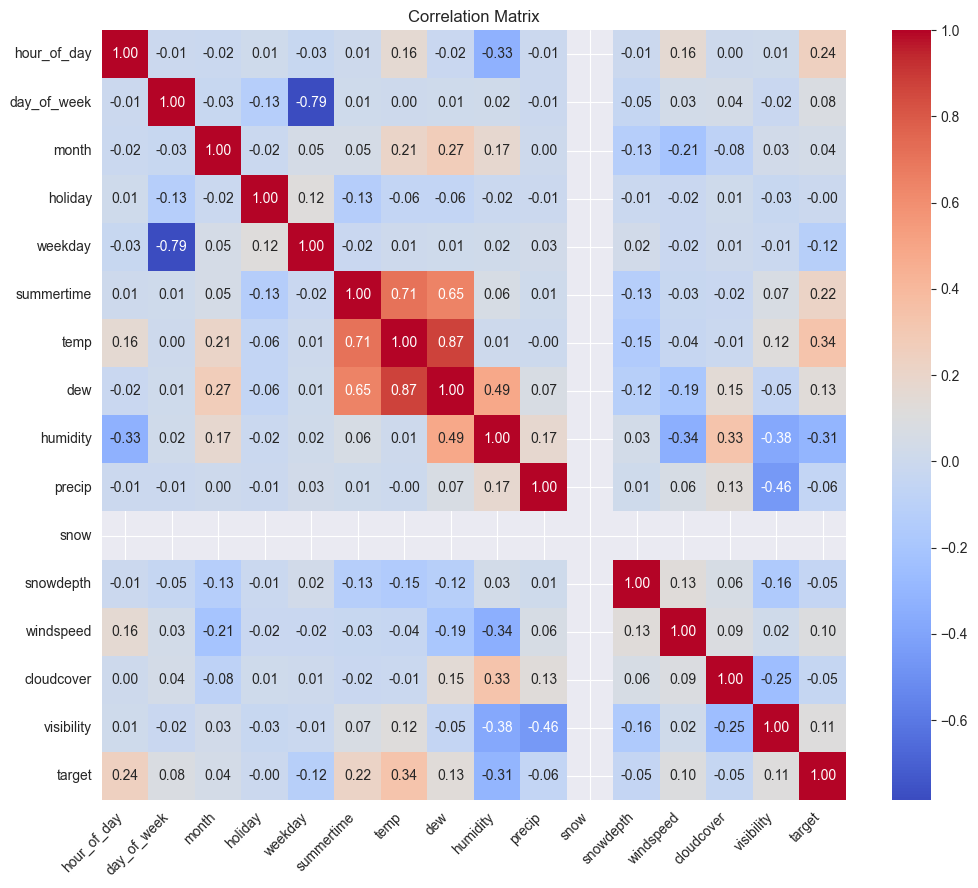

In [42]:
# show correlation matrix
corr = data.drop(columns=['increase_stock']).select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.xticks(rotation=45, ha='right')
plt.title("Correlation Matrix")
plt.show()

In [43]:
# weird snow column
print(data.snow.value_counts()) # column has only value 0 -> drop it

snow
0    1600
Name: count, dtype: int64


In [44]:
data = data.drop(columns=['snow'])
data.columns

Index(['hour_of_day', 'day_of_week', 'month', 'holiday', 'weekday',
       'summertime', 'temp', 'dew', 'humidity', 'precip', 'snowdepth',
       'windspeed', 'cloudcover', 'visibility', 'increase_stock', 'target'],
      dtype='object')

In [45]:
data.head()

,hour_of_day,day_of_week,month,holiday,weekday,summertime,temp,dew,humidity,precip,snowdepth,windspeed,cloudcover,visibility,increase_stock,target
0,5,5,1,0,0,0,-7.2,-15.0,53.68,0.0,0.0,16.3,31.6,16.0,low_bike_demand,0
1,21,4,1,0,1,0,-1.3,-12.8,40.97,0.0,0.0,23.9,85.7,16.0,low_bike_demand,0
2,21,3,8,0,1,1,26.9,21.8,73.39,0.0,0.0,0.0,81.1,16.0,low_bike_demand,0
3,1,6,1,0,0,0,3.1,-4.0,59.74,0.0,0.0,19.2,0.0,16.0,low_bike_demand,0
4,17,0,3,0,1,0,11.7,-11.4,18.71,0.0,0.0,10.5,44.6,16.0,low_bike_demand,0


In [46]:
categorical_feats = ['hour_of_day', 'day_of_week', 'month', 'holiday', 
                     'weekday', 'summertime', 'increase_stock']
numerical_feats = ['temp', 'dew', 'humidity', 'precip', 'snow_depth', 
                   'windspeed', 'cloudcover', 'visibility']

In [47]:
month_map = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
             7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
day_of_week_map = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}


C:\Users\mkami\AppData\Local\Temp\ipykernel_2460\375740362.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels([day_of_week_map[i] for i in range(7)])
C:\Users\mkami\AppData\Local\Temp\ipykernel_2460\375740362.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2].set_xticklabels([month_map[i] for i in range(1, 13)])


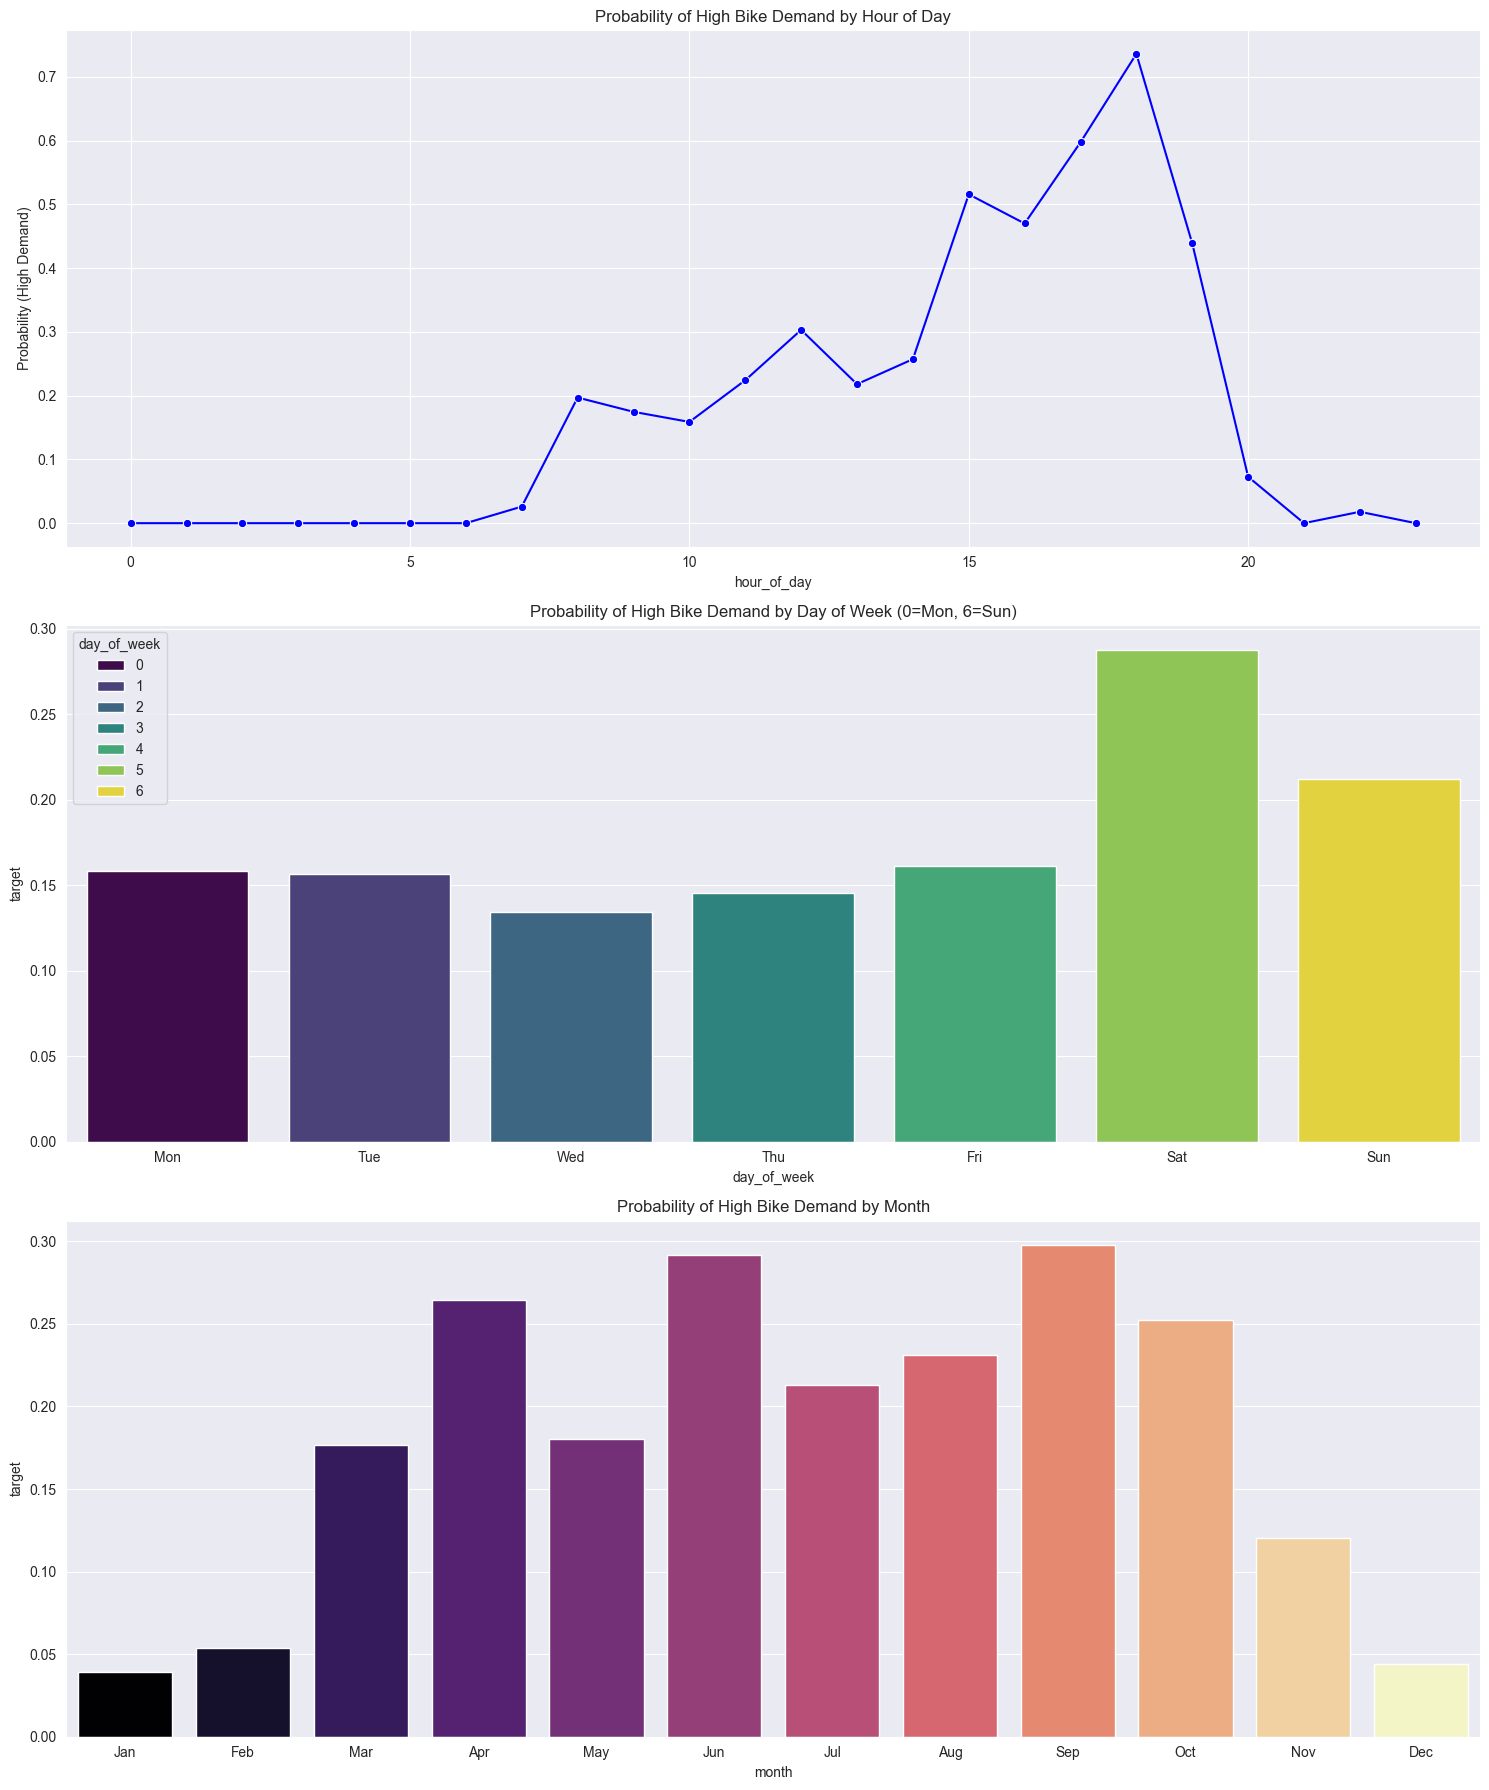

In [48]:
fig, axes = plt.subplots(3, 1, figsize=(15, 18))
sns.set_style("darkgrid")
# 1. Hourly Trend
sns.lineplot(data=data, x='hour_of_day', y='target', errorbar=None, marker='o', ax=axes[0], color='blue')
axes[0].set_title('Probability of High Bike Demand by Hour of Day')
axes[0].set_ylabel('Probability (High Demand)')

# 2. Weekly Trend
sns.barplot(data=data, x='day_of_week', y='target', errorbar=None, ax=axes[1], palette='viridis', hue='day_of_week')
axes[1].set_title('Probability of High Bike Demand by Day of Week (0=Mon, 6=Sun)')
axes[1].set_xticklabels([day_of_week_map[i] for i in range(7)])

# 3. Monthly Trend
sns.barplot(data=data, x='month', y='target', errorbar=None, ax=axes[2], palette='magma', hue='month')
axes[2].set_title('Probability of High Bike Demand by Month')
axes[2].set_xticklabels([month_map[i] for i in range(1, 13)])
axes[2].legend_.remove()

plt.tight_layout()
plt.show()

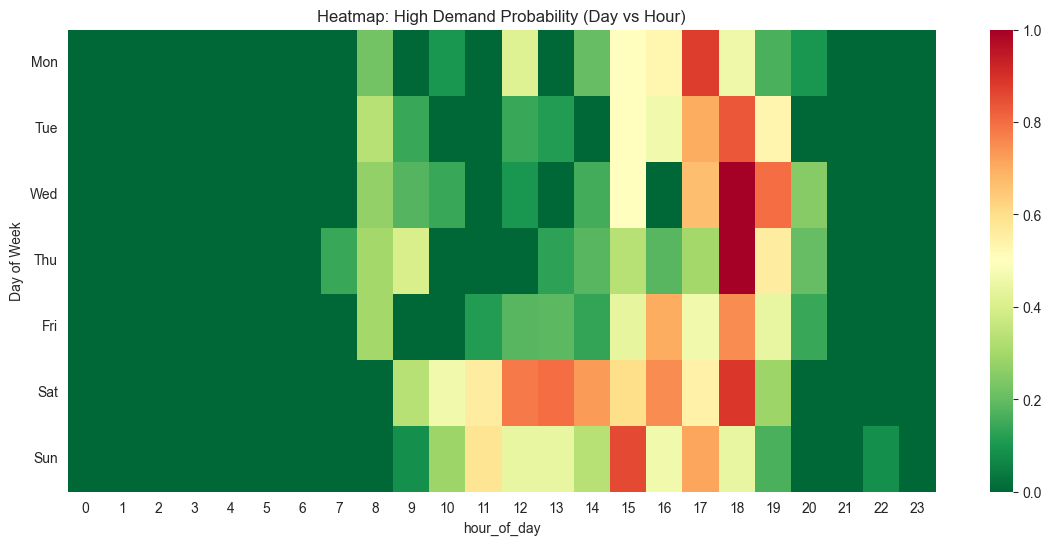

In [49]:
# This shows Hour vs Day of Week interaction (Critical for commute patterns)
pivot_table = data.pivot_table(index='day_of_week', columns='hour_of_day', values='target', aggfunc='mean')
plt.figure(figsize=(14, 6))
sns.heatmap(pivot_table, cmap='RdYlGn_r', annot=False) # Red = Low Demand, Green = High Demand (adjusted by cmap)
plt.yticks(ticks=[0.5 + i for i in range(7)], labels=[day_of_week_map[i] for i in range(7)], rotation=0)
plt.title('Heatmap: High Demand Probability (Day vs Hour)')
plt.ylabel('Day of Week')
plt.show()

C:\Users\mkami\AppData\Local\Temp\ipykernel_2460\2091878319.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(['Weekend', 'Weekday'])


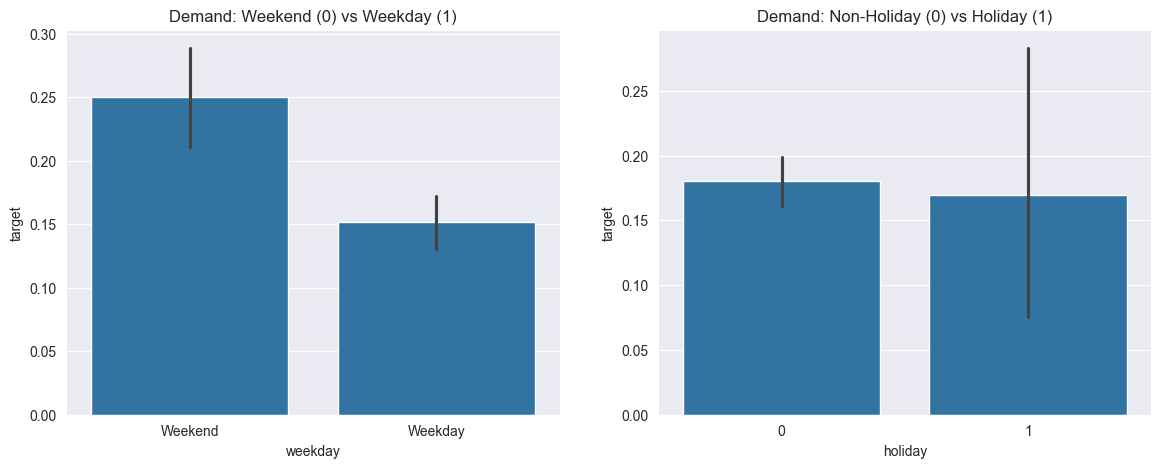

In [50]:
# --- B. Weekdays vs Holidays ---

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Weekday vs Weekend
sns.barplot(data=data, x='weekday', y='target', ax=axes[0])
axes[0].set_title('Demand: Weekend (0) vs Weekday (1)')
axes[0].set_xticklabels(['Weekend', 'Weekday'])

# Holiday vs Non-Holiday
sns.barplot(data=data, x='holiday', y='target', ax=axes[1])
axes[1].set_title('Demand: Non-Holiday (0) vs Holiday (1)')

plt.show()

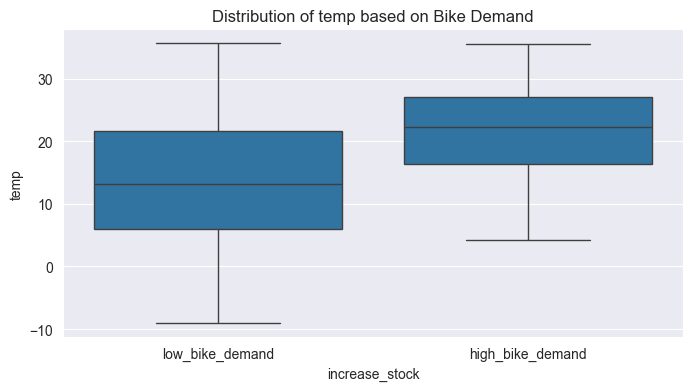

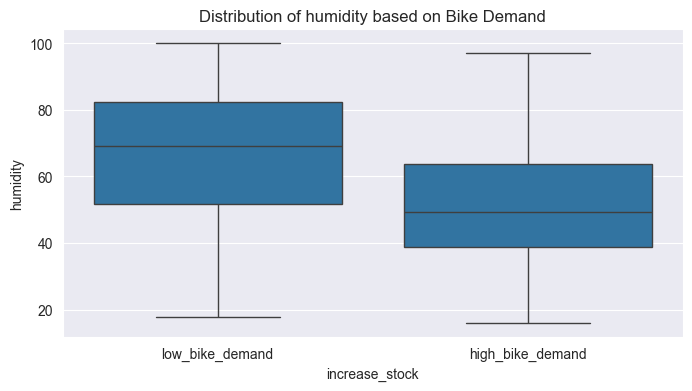

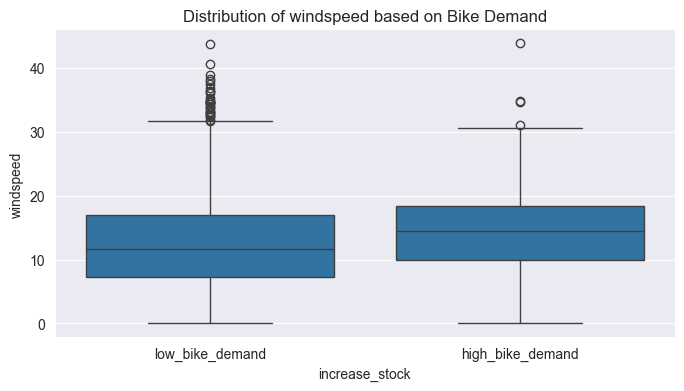

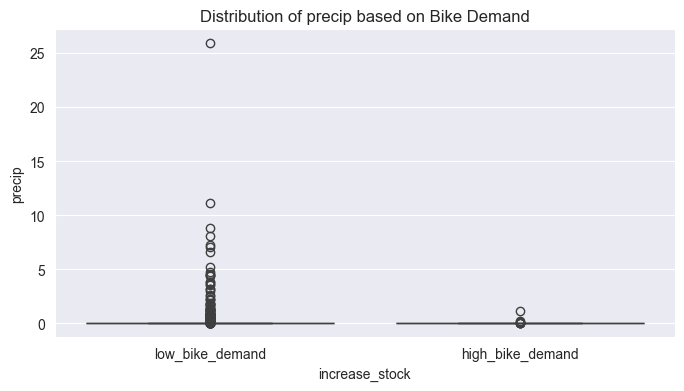

In [51]:
# We use Boxplots to see if the distribution of weather variables differs
# between times we need bikes (high demand) and times we don't (low demand).

weather_cols_to_plot = [c for c in ['temp', 'humidity', 'windspeed', 'precip'] if c in data.columns]

for col in weather_cols_to_plot:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=data, x='increase_stock', y=col)
    plt.title(f'Distribution of {col} based on Bike Demand')
    plt.show()

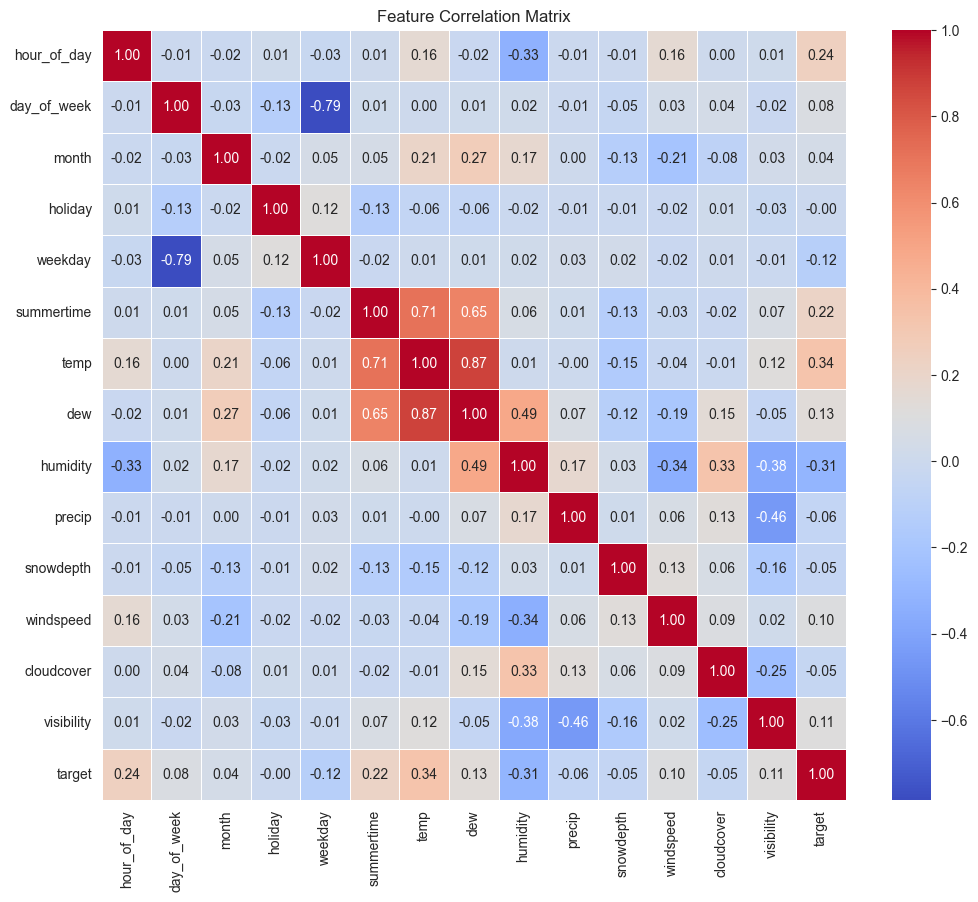

In [ ]:
plt.figure(figsize=(12, 10))
# Calculate correlation only on numeric columns (including our target_num)
corr = data.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Matrix'd)
plt.show()

holiday, snow, month, precip change into is raining, 